# `ibis` to write and execute SQL expressions in Python.

In [1]:
<!--
  
    if 'repo' not in locals():
        repo = __import__('requests').get('https://api.github.com/repos/ibis-project/ibis').json()
    image = lambda *x:"""<div class="imageflex" style="display:flex;">%s</div>"""%''.join(F'''<img src="data:image/png;base64,{base64.b64encode(x._repr_png_()).decode()}"/>''' for x in x)
            
-->
<style>
.imageflex:hover img {transform: scale(.8);}
.imageflex img {transform: scale(.3);}
</style>

<!--
  
    if 'repo' not in locals():
        repo = __import__('requests').get('https://api.github.com/repos/ibis-project/ibis').json()
    image = lambda *x:"""<div class="imageflex" style="display:flex;">%s</div>"""%''.join(F'''<img src="data:image/png;base64,{base64.b64encode(x._repr_png_()).decode()}"/>''' for x in x)
            
-->
<style>
.imageflex:hover img {transform: scale(.8);}
.imageflex img {transform: scale(.3);}
</style>

In [2]:
    import ibis, pandas, dask, pandas as 🐼, pytest, base64

    import ibis, pandas, dask, pandas as 🐼, pytest, base64

In [3]:
[`ibis`] is mature open source project that has been in development for ~{{((_panda_face_.to_datetime('now').tz_localize('utc')-_panda_face_.to_datetime(repo['created_at'])).days/365).__round__()}} years with {{repo['stargazers_count']}} ⭐️s that provides an interface to SQL for [Python] programmers to:

1. Write backend independent SQL expressions in Python.
2. Access different database connections (eg. sqlite, omnisci).

Some scientists and analysts will be asked to access information in databases despite a lack in experience.
Typically, folks would have to learn entirely new syntax to perform even simple tasks in SQL. 
Now, those with Python abilities can avoid a steep learning curve
by using the [`ibis`] producivity framework for composing and executing expressions in [SQL]
by making connections to familiar fluent syntaxes ala `🐼 and dask`.

`ibis` bridges the gap between Python and remote storage and execution systems. It transforms 
SQL expresions into idiomatic python syntax that is directly wired to scientific python community.
`ibis` provides visualizations that facilitate the lazy composition of SQL expressions.
For those seasoned in Python and novice at SQL, `ibis` is a fun and familiar to connect Python to databases.

`ibis` has a lot features that we'll reveal over time as we spend time bolstering the `ibis`
community and improving documentation. 

* This document focuses on __writing SQL expressions in Python__
and how `ibis` allows you to visually compose queries. 
* To demonstrate the features we are going to 
use SQLite [Sean Lahman's ⚾️ database](http://www.seanlahman.com/baseball-archive/statistics/).
            
    
[`ibis`]: #
[SQL]: #
[Python]: #
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[big query]: https://cloud.google.com/community/tutorials/bigquery-ibis
[design]: https://docs.ibis-project.org/design.html

[`ibis`] is mature open source project that has been in development for ~5 years with 1342 ⭐️s that provides an interface to SQL for [Python] programmers to:

1. Write backend independent SQL expressions in Python.
2. Access different database connections (eg. sqlite, omnisci).

Some scientists and analysts will be asked to access information in databases despite a lack in experience.
Typically, folks would have to learn entirely new syntax to perform even simple tasks in SQL. 
Now, those with Python abilities can avoid a steep learning curve
by using the [`ibis`] producivity framework for composing and executing expressions in [SQL]
by making connections to familiar fluent syntaxes ala `🐼 and dask`.

`ibis` bridges the gap between Python and remote storage and execution systems. It transforms 
SQL expresions into idiomatic python syntax that is directly wired to scientific python community.
`ibis` provides visualizations that facilitate the lazy composition of SQL expressions.
For those seasoned in Python and novice at SQL, `ibis` is a fun and familiar to connect Python to databases.

`ibis` has a lot features that we'll reveal over time as we spend time bolstering the `ibis`
community and improving documentation. 

* This document focuses on __writing SQL expressions in Python__
and how `ibis` allows you to visually compose queries. 
* To demonstrate the features we are going to 
use SQLite [Sean Lahman's ⚾️ database](http://www.seanlahman.com/baseball-archive/statistics/).
            
    
[`ibis`]: #
[SQL]: #
[Python]: #
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[big query]: https://cloud.google.com/community/tutorials/bigquery-ibis
[design]: https://docs.ibis-project.org/design.html

In [4]:
## Connecting to a database.

Whenever we speak of databases, we'll need a [database connection]. `ibis` makes it easy to make different database connections or `client`s.

    client = ibis.sqlite.connect('lahmansbaseballdb.sqlite')
    
> It will be important to use the correct `ibis` client for the file type.
    
    >>> assert isinstance(client, ibis.client.Client)
    
[Sean Lahman's ⚾️ database] has {{client.list_tables().__len__()}} tables and below we sample some the table names.

    >>> client.list_tables()
    [...'appearances'...'halloffame', 'homegames', 'leagues', 'managers',...]
 
[database connection]: https://en.wikipedia.org/wiki/Database_connection

## Connecting to a database.

Whenever we speak of databases, we'll need a [database connection]. `ibis` makes it easy to make different database connections or `client`s.

    client = ibis.sqlite.connect('lahmansbaseballdb.sqlite')
    
> It will be important to use the correct `ibis` client for the file type.
    
    >>> assert isinstance(client, ibis.client.Client)
    
[Sean Lahman's ⚾️ database] has 29 tables and below we sample some the table names.

    >>> client.list_tables()
    [...'appearances'...'halloffame', 'homegames', 'leagues', 'managers',...]
 
[database connection]: https://en.wikipedia.org/wiki/Database_connection

To demonstrate some of `ibis`'s capabilities we'll discuss information in the `halloffame` and `appearances` tables.

    halloffame, appearances = client.table('halloffame'), client.table('appearances')
    
A feature of Ibis is a visual DAG representation of our SQL query using graphviz, `dask` users will be familiar with this
feature.

<div class="imageflex" style="display:flex;">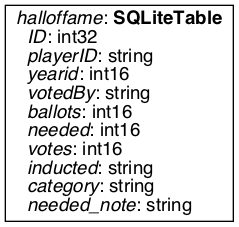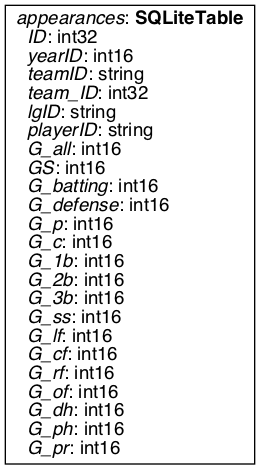</div>

A table does not hold any data, rather is an expression that can be appended to manipulate data in a database.

    >>> assert isinstance(halloffame, ibis.expr.types.TableExpr)

    sample = halloffame.head()
    
Looking at a `sample` expression we can reveal the SQL query we constructed.
    
    >>> str(sample.compile())
    'SELECT t0."ID", t0."playerID",...FROM base.halloffame AS t0...LIMIT ? OFFSET ?'
    
And, we can execute the expression to return a `🐼.DataFrame`.
    
    >>> assert isinstance(sample.execute(), 🐼.DataFrame)

<br/>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ID</th>
      <th>playerID</th>
      <th>yearid</th>
      <th>votedBy</th>
      <th>ballots</th>
      <th>needed</th>
      <th>votes</th>
      <th>inducted</th>
      <th>category</th>
      <th>needed_note</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>cobbty01</td>
      <td>1936</td>
      <td>BBWAA</td>
      <td>226</td>
      <td>170</td>
      <td>222</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>ruthba01</td>
      <td>1936</td>
      <td>BBWAA</td>
      <td>226</td>
      <td>170</td>
      <td>215</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>wagneho01</td>
      <td>1936</td>
      <td>BBWAA</td>
      <td>226</td>
      <td>170</td>
      <td>215</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>mathech01</td>
      <td>1936</td>
      <td>BBWAA</td>
      <td>226</td>
      <td>170</td>
      <td>205</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>johnswa01</td>
      <td>1936</td>
      <td>BBWAA</td>
      <td>226</td>
      <td>170</td>
      <td>189</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
    </tr>
  </tbody>
</table>
    

In [13]:
To demonstrate some of `ibis`'s capabilities we'll discuss information in the `halloffame` and `appearances` tables.

    halloffame, appearances = client.table('halloffame'), client.table('appearances')
    
A feature of Ibis is a visual DAG representation of our SQL query using graphviz, `dask` users will be familiar with this
feature.

{{image(halloffame, appearances)}}

A table does not hold any data, rather is an expression that can be appended to manipulate data in a database.

    >>> assert isinstance(halloffame, ibis.expr.types.TableExpr)

    sample = halloffame.head()
    
Looking at a `sample` expression we can reveal the SQL query we constructed.
    
    >>> str(sample.compile())
    'SELECT t0."ID", t0."playerID",...FROM base.halloffame AS t0...LIMIT ? OFFSET ?'
    
And, we can execute the expression to return a `🐼.DataFrame`.
    
    >>> assert isinstance(sample.execute(), 🐼.DataFrame)

<br/>
{{sample.execute().to_html()}}
    

Let's start making SQL query with `ibis`. First, we'll make a selection that filters only the players from our data.
    
    players = halloffame[halloffame.category == 'Player']
    
<div class="imageflex" style="display:flex;">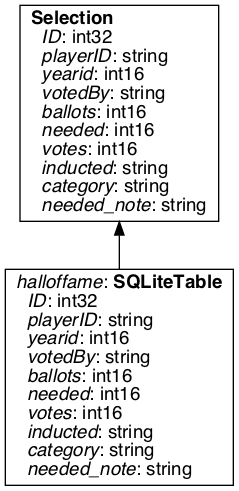</div>  

In [14]:
Let's start making SQL query with `ibis`. First, we'll make a selection that filters only the players from our data.
    
    players = halloffame[halloffame.category == 'Player']
    
{{image(players)}}  

Looking at the `halloffame` players and `appearances` requires joining the
two tables. We'll perform an inner join based on the playerID column.
    
    predicate = players.playerID == appearances.playerID
    
These tables share columns, but SQL does not like overlapping columns.
    
    columns = [x for x in appearances.columns if x not in {'playerID', 'ID'}]
    
Composing the join.
    
    unmaterialized = players.join(appearances[columns], predicate)
    
The table is not materialized or held in memory yet.  This is a SQL thing, 
in Python we add the materialize method.

    join = unmaterialized.materialize()
    #unmaterialized.distinct()
    
    
    join = join.materialize().distinct()  # like 🐼.DataFrame.drop_duplicates

A sample of the joined data.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ID</th>
      <th>playerID</th>
      <th>yearid</th>
      <th>votedBy</th>
      <th>ballots</th>
      <th>needed</th>
      <th>votes</th>
      <th>inducted</th>
      <th>category</th>
      <th>needed_note</th>
      <th>yearID</th>
      <th>teamID</th>
      <th>team_ID</th>
      <th>lgID</th>
      <th>G_all</th>
      <th>GS</th>
      <th>G_batting</th>
      <th>G_defense</th>
      <th>G_p</th>
      <th>G_c</th>
      <th>G_1b</th>
      <th>G_2b</th>
      <th>G_3b</th>
      <th>G_ss</th>
      <th>G_lf</th>
      <th>G_cf</th>
      <th>G_rf</th>
      <th>G_of</th>
      <th>G_dh</th>
      <th>G_ph</th>
      <th>G_pr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2861</td>
      <td>aaronha01</td>
      <td>1982</td>
      <td>BBWAA</td>
      <td>415</td>
      <td>312</td>
      <td>406</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3744</td>
      <td>abbotji01</td>
      <td>2005</td>
      <td>BBWAA</td>
      <td>516</td>
      <td>387</td>
      <td>13</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>147</td>
      <td>adamsba01</td>
      <td>1937</td>
      <td>BBWAA</td>
      <td>201</td>
      <td>151</td>
      <td>8</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>260</td>
      <td>adamsba01</td>
      <td>1938</td>
      <td>BBWAA</td>
      <td>262</td>
      <td>197</td>
      <td>11</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>385</td>
      <td>adamsba01</td>
      <td>1939</td>
      <td>BBWAA</td>
      <td>274</td>
      <td>206</td>
      <td>11</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<div class="imageflex" style="display:flex;">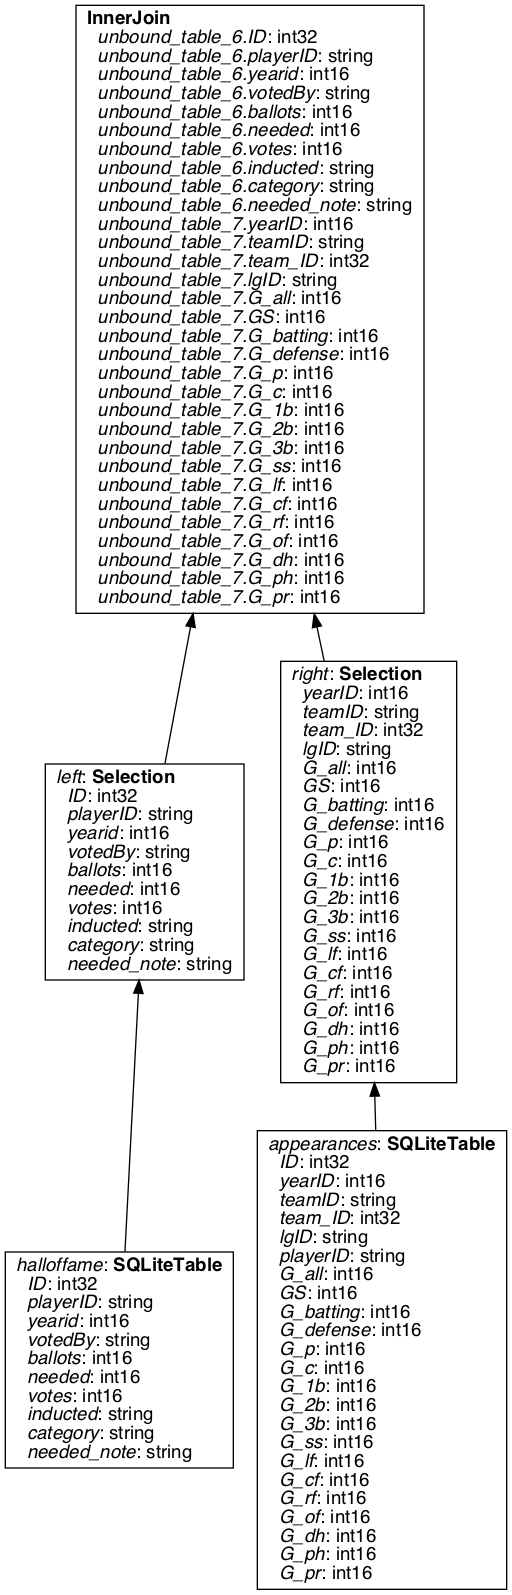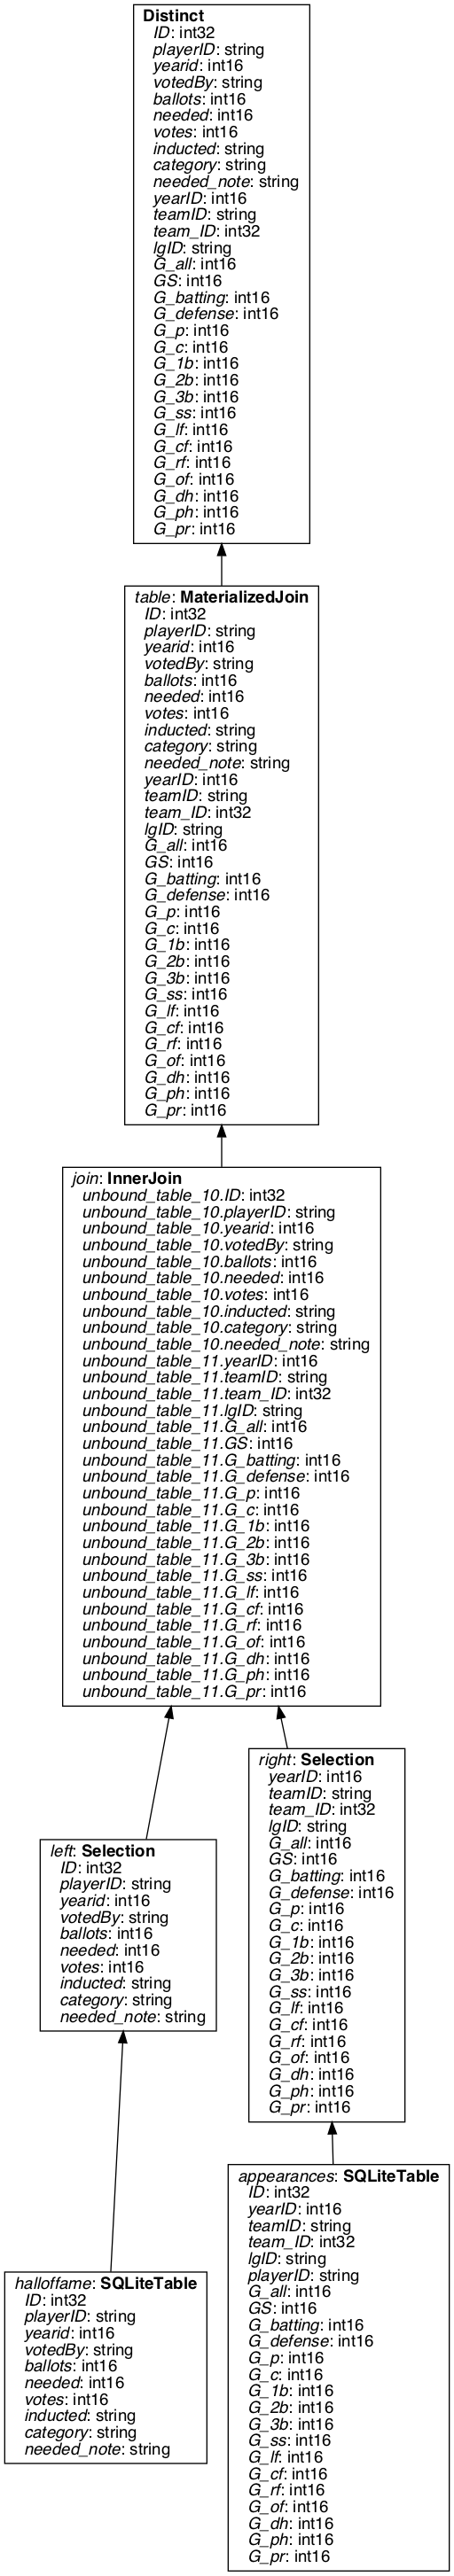</div>

In [15]:
Looking at the `halloffame` players and `appearances` requires joining the
two tables. We'll perform an inner join based on the playerID column.
    
    predicate = players.playerID == appearances.playerID
    
These tables share columns, but SQL does not like overlapping columns.
    
    columns = [x for x in appearances.columns if x not in {'playerID', 'ID'}]
    
Composing the join.
    
    unmaterialized = players.join(appearances[columns], predicate)
    
The table is not materialized or held in memory yet.  This is a SQL thing, 
in Python we add the materialize method.

    join = unmaterialized.materialize()
    #unmaterialized.distinct()
    
    
    join = join.materialize().distinct()  # like 🐼.DataFrame.drop_duplicates

A sample of the joined data.

{{join.head().execute().to_html()}}
{{image(unmaterialized, join)}}

In [16]:
<hr/>

`ibis` supports multiple join strategies.

    >>> [x for x in dir(players) if 'join' in x]
    ['anti_join', 'any_inner_join', 'any_left_join', 'asof_join', 'cross_join', 'inner_join', 'join', 'left_join', 'outer_join', 'semi_join']

<hr/>

<hr/>

`ibis` supports multiple join strategies.

    >>> [x for x in dir(players) if 'join' in x]
    ['anti_join', 'any_inner_join', 'any_left_join', 'asof_join', 'cross_join', 'inner_join', 'join', 'left_join', 'outer_join', 'semi_join']

<hr/>

In [17]:
    batters, pitchers = join[join.G_batting > 100], join[join.G_p > 100]
        
End to end sql expressions that would have required a lot of learning in SQL.


    batters, pitchers = join[join.G_batting > 100], join[join.G_p > 100]
        
End to end sql expressions that would have required a lot of learning in SQL.

In [18]:
What datasets would you like to see.

What datasets would you like to see.